**Name - SAWANT SWARA ANANT                                                   
              Reg No - 20BCE0779                                                    
SmartBridge Externship Program - AI                                    
                Assignment - 2**


Dataset Link: https://www.kaggle.com/datasets/prathamtripathi/drug-classification

**Task 1** - Read the dataset and do data pre-processing


In [ ]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
#Read the dataset
df = pd.read_csv('/content/drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [ ]:
#describe the dataset
df.describe(include='all')

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,200.000000,200,200,200,200.000000,200
unique,NaN,2,3,2,NaN,5
top,NaN,M,HIGH,HIGH,NaN,DrugY
freq,NaN,104,77,103,NaN,91
mean,44.315000,NaN,NaN,NaN,16.084485,NaN
std,16.544315,NaN,NaN,NaN,7.223956,NaN
min,15.000000,NaN,NaN,NaN,6.269000,NaN
25%,31.000000,NaN,NaN,NaN,10.445500,NaN
50%,45.000000,NaN,NaN,NaN,13.936500,NaN
75%,58.000000,NaN,NaN,NaN,19.380000,NaN


In [ ]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [ ]:
names = ['Age',	'Na_to_K']


for i,j in enumerate(names):
  print(i,j)

0 Age
1 Na_to_K


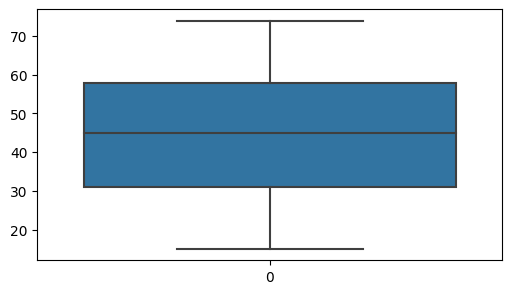

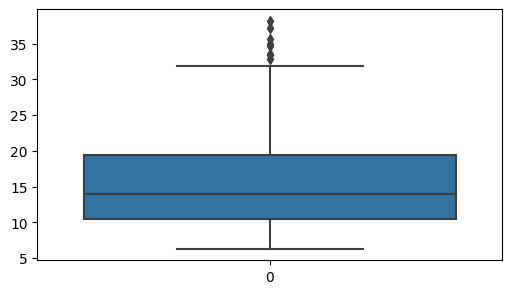

In [ ]:
#plot for numeric values
for i,j in enumerate(names):
  plt.figure(figsize=(6,15))
  plt.subplot(4,1,i+1)
  sns.boxplot(df[j])

In [ ]:
#detecting outliers
print(np.where(df['Na_to_K']>30))

(array([ 22,  24,  26,  33,  48,  96,  98, 128, 131, 184, 188, 194]),)


In [ ]:
#z-score
z = np.abs(stats.zscore(df['Na_to_K']))
print(z)

0      1.286522
1      0.415145
2      0.828558
3      1.149963
4      0.271794
         ...   
195    0.626917
196    0.565995
197    0.859089
198    0.286500
199    0.657170
Name: Na_to_K, Length: 200, dtype: float64


In [ ]:
#Inter Quartile Range (IQR)
Q1 = np.percentile(df['Na_to_K'], 25, method='midpoint')
Q3 = np.percentile(df['Na_to_K'], 75, method='midpoint')
IQR = Q3 - Q1
print(IQR)

8.947


In [ ]:
upper=Q3+1.5*IQR
upper_array=np.where(df['Na_to_K']>=upper)[0]

lower=Q1-1.5*IQR
lower_array=np.where(df['Na_to_K']<=lower)[0]


In [ ]:
#removing outliers
df.drop(index=upper_array, inplace=True)
df.drop(index=lower_array, inplace=True)

<Axes: >

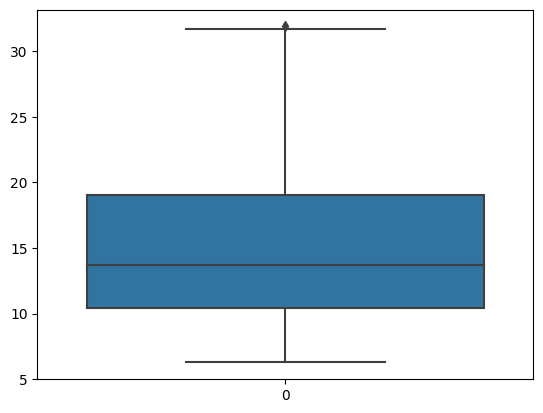

In [ ]:
sns.boxplot(df['Na_to_K'])

In [ ]:
# Spliting the data

#Step 1: Split dependent and independent data

df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [ ]:
x = df.iloc[:,0:5] # iloc[:,:]
x.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043


In [ ]:
y=df['Drug']
y.head()

0    DrugY
1    drugC
2    drugC
3    drugX
4    DrugY
Name: Drug, dtype: object

In [ ]:
#Step 2: Split training and testing data

from sklearn.model_selection import train_test_split


In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=12)

In [ ]:
x.shape, y.shape

((192, 5), (192,))

In [ ]:
xtrain.shape, xtest.shape

((153, 5), (39, 5))

In [ ]:
ytrain.shape, ytest.shape

((153,), (39,))

Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
xtest['Sex']

63     M
11     F
178    M
87     M
150    M
95     M
21     M
67     M
23     F
62     M
134    F
169    F
147    F
7      M
106    M
170    F
32     M
192    M
56     M
33     F
30     F
199    F
101    F
109    M
52     M
172    F
137    F
116    M
198    M
48     M
1      M
5      F
93     F
130    F
91     M
14     F
132    M
12     M
89     F
Name: Sex, dtype: object

In [ ]:
ytest

63     drugX
11     DrugY
178    DrugY
87     DrugY
150    drugA
95     drugX
21     DrugY
67     drugX
23     DrugY
62     DrugY
134    DrugY
169    drugA
147    drugA
7      drugC
106    drugX
170    drugX
32     drugX
192    DrugY
56     drugB
33     DrugY
30     drugX
199    drugX
101    drugA
109    DrugY
52     DrugY
172    DrugY
137    drugA
116    drugX
198    drugX
48     DrugY
1      drugC
5      drugX
93     DrugY
130    DrugY
91     DrugY
14     drugX
132    drugX
12     DrugY
89     DrugY
Name: Drug, dtype: object

In [ ]:
xtrain['Sex'] = le.fit_transform(xtrain['Sex'])
xtest['Sex'] = le.transform(xtest['Sex'])
xtrain['BP'] = le.fit_transform(xtrain['BP'])
xtest['BP'] = le.transform(xtest['BP'])
xtrain['Cholesterol'] = le.fit_transform(xtrain['Cholesterol'])
xtest['Cholesterol'] = le.transform(xtest['Cholesterol'])

In [ ]:
ytrain=le.fit_transform(ytrain)
ytest=le.transform(ytest)

In [ ]:
ytest

array([4, 0, 0, 0, 1, 4, 0, 4, 0, 0, 0, 1, 1, 3, 4, 4, 4, 0, 2, 0, 4, 4,
       1, 0, 0, 0, 1, 4, 4, 0, 3, 4, 0, 0, 0, 4, 4, 0, 0])

**Task 2** - Build the ANN model with (input layer, min 3 hidden layers & output layer)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
reg_model = Sequential()
# Adding the input layer to the model
reg_model.add(Dense(64,activation='relu',input_shape=(5,)))

reg_model.add(Dense(64,activation='relu'))

reg_model.add(Dense(32,activation='relu'))

reg_model.add(Dense(128,activation='relu'))
# Adding output layer
reg_model.add(Dense(1,activation='linear'))

In [ ]:
reg_model.compile(optimizer='adam',loss='mean_squared_error', metrics=['mse'])

In [ ]:
reg_model.fit(xtrain,ytrain,epochs=20,batch_size=4,validation_data=(xtest,ytest))

Epoch 1/20
39/39 [==============================] - 1s 6ms/step - loss: 3.0802 - mse: 3.0802 - val_loss: 4.2364 - val_mse: 4.2364
Epoch 2/20
39/39 [==============================] - 0s 2ms/step - loss: 2.6564 - mse: 2.6564 - val_loss: 3.8085 - val_mse: 3.8085
Epoch 3/20
39/39 [==============================] - 0s 2ms/step - loss: 2.4632 - mse: 2.4632 - val_loss: 3.8454 - val_mse: 3.8454
Epoch 4/20
39/39 [==============================] - 0s 2ms/step - loss: 2.1530 - mse: 2.1530 - val_loss: 3.6256 - val_mse: 3.6256
Epoch 5/20
39/39 [==============================] - 0s 2ms/step - loss: 2.0698 - mse: 2.0698 - val_loss: 3.1242 - val_mse: 3.1242
Epoch 6/20
39/39 [==============================] - 0s 2ms/step - loss: 1.7210 - mse: 1.7210 - val_loss: 2.5011 - val_mse: 2.5011
Epoch 7/20
39/39 [==============================] - 0s 3ms/step - loss: 1.5891 - mse: 1.5891 - val_loss: 2.1988 - val_mse: 2.1988
Epoch 8/20
39/39 [==============================] - 0s 2ms/step - loss: 1.4193 - mse: 1.41

**Task 3** - Test the model with random data

In [ ]:
ypred = reg_model.predict(xtest)

2/2 [==============================] - 0s 5ms/step


In [ ]:
comp = pd.DataFrame(ytest)  # Creating a dataframe
comp.columns = ['Actual Value']  # Changing the column name
comp['Predicted values'] = ypred  # Creating a column based onth prediction
comp

,Actual Value,Predicted values
0,4,2.565673
1,0,0.387339
2,0,1.440738
3,0,1.489535
4,1,1.837911
5,4,1.935913
6,0,0.469259
7,4,3.193955
8,0,1.048495
9,0,0.864873


In [ ]:
actual_values = comp['Actual Value']
predicted_values = comp['Predicted values']

test_loss = mean_squared_error(actual_values, predicted_values)

threshold = 0.5
correct_predictions = (predicted_values >= threshold) == (actual_values >= threshold)

test_accuracy = sum(correct_predictions) / len(correct_predictions)

print("Test Accuracy:", test_accuracy)
print("Test Loss:", test_loss)

Test Accuracy: 0.717948717948718
Test Loss: 1.4045006801299342


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(ytest, ypred)
mse = mean_squared_error(ytest, ypred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)

Mean Absolute Error (MAE): 0.9904674994639862
Mean Squared Error (MSE): 1.4045006801299342


In [ ]:
'''results = reg_model.evaluate(xtest,ytest)
loss=results[0]
accuracy=results[1]
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')'''

2/2 [==============================] - 0s 9ms/step - loss: 1.4045 - mse: 1.4045
Test Loss: 1.4045007228851318
Test Accuracy: 1.4045007228851318
